In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #import decision tree classifier
from sklearn.model_selection import train_test_split # import train test split
from sklearn import metrics #accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
l1 = pd.Series({'Age':'smaller than 21', 'Income':'high' , 'Gender':'m' ,'Martial_status':'sin' ,'Buys':'no' })
l2 = pd.Series({'Age':'smaller than 21', 'Income': 'high', 'Gender':'m' ,'Martial_status':'mar' ,'Buys': 'no'})
l3 = pd.Series({'Age': '21-35', 'Income':'high' , 'Gender':'m' ,'Martial_status':'sin' ,'Buys':'yes' })
l4 = pd.Series({'Age': 'greater than 35', 'Income':'med' , 'Gender':'m' ,'Martial_status':'sin' ,'Buys':'yes' })
l5 = pd.Series({'Age': 'greater than 35', 'Income':'low' , 'Gender':'f' ,'Martial_status':'sin' ,'Buys':'yes' })
l6 = pd.Series({'Age': 'greater than 35', 'Income':'low' , 'Gender':'f' ,'Martial_status':'mar' ,'Buys': 'no'})
l7= pd.Series({'Age':'21-35', 'Income':'low' , 'Gender':'f' ,'Martial_status':'mar' ,'Buys':'yes' })
l8 = pd.Series({'Age':'smaller than 21', 'Income':'med' , 'Gender':'m' ,'Martial_status':'sin' ,'Buys': 'no'})
l9 = pd.Series({'Age':'smaller than 21', 'Income':'low' , 'Gender':'f' ,'Martial_status':'mar','Buys':'yes' })
l10 = pd.Series({'Age':'greater than 35', 'Income':'med' , 'Gender': 'f','Martial_status':'sin' ,'Buys':'yes' })
l11 = pd.Series({'Age':'smaller than 21', 'Income':'med' , 'Gender':'f' ,'Martial_status':'mar' ,'Buys':'yes' })
l12 = pd.Series({'Age':'21-35', 'Income':'low' , 'Gender':'m' ,'Martial_status':'mar' ,'Buys':'yes' })
l13 = pd.Series({'Age':'21-35', 'Income':'high' , 'Gender':'f' ,'Martial_status':'sin' ,'Buys':'yes' })
l14 = pd.Series({'Age':'greater than 35', 'Income':'med' , 'Gender':'m' ,'Martial_status':'mar' ,'Buys':'no' })
df=pd.DataFrame([l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14])
df.head()


,Age,Income,Gender,Martial_status,Buys
0,smaller than 21,high,m,sin,no
1,smaller than 21,high,m,mar,no
2,21-35,high,m,sin,yes
3,greater than 35,med,m,sin,yes
4,greater than 35,low,f,sin,yes


In [3]:
df.shape

(14, 5)

In [4]:
le=LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df['Income'] = le.fit_transform(df['Income'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Martial_status'] = le.fit_transform(df['Martial_status'])
df['Buys'] = le.fit_transform(df['Buys'])
df.head()

,Age,Income,Gender,Martial_status,Buys
0,2,0,1,1,0
1,2,0,1,0,0
2,0,0,1,1,1
3,1,2,1,1,1
4,1,1,0,1,1


In [5]:
X = df[['Age','Income','Gender','Martial_status']]
y = df['Buys']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 10)

In [7]:
#create decision tree classifier
clf = DecisionTreeClassifier()
# train decision tree classifier
clf = clf.fit(X_train,y_train)
#predict the response
y_pred = clf.predict(X_test)

In [8]:
#Model accuracy
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy:  0.6
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.50      0.67         4

    accuracy                           0.60         5
   macro avg       0.67      0.75      0.58         5
weighted avg       0.87      0.60      0.63         5



In [9]:
new_input = [[2,1,0,0]]
new_output = clf.predict(new_input)
print(new_input,new_output)

[[2, 1, 0, 0]] [0]


In [10]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

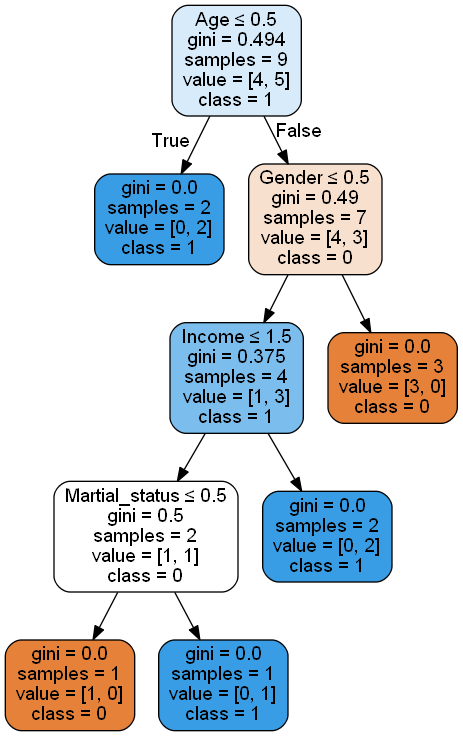

In [11]:
from six import StringIO

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['Age','Income','Gender','Martial_status'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision.png')
Image(graph.create_png())
